In [29]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import random

import matplotlib.pyplot as plt

In [38]:
print("hi")

hi


In [16]:
%pwd

'C:\\Users\\hsoh'

In [17]:
random_seed = 42
torch.manual_seed(random_seed)
random.seed(random_seed)

In [35]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기를 VGGNet의 입력 크기로 변경
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [36]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [39]:
vgg16 = models.vgg16(pretrained=False)
vgg16.classifier[6] = nn.Linear(4096, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
# 각 레이어의 정보 출력
for name, layer in vgg16.named_children():
    print(f"Layer name: {name}")
    print(layer)

Layer name: features
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2

In [22]:
model_state_dict = vgg16.state_dict()

In [23]:
model_state_dict["features.0.weight"].size()

torch.Size([64, 3, 3, 3])

In [40]:
checkpoint_path = f"model_1_inital.pth"
torch.save(vgg16.state_dict(), checkpoint_path)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.0001)

In [25]:
losses = []
acc = []
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if (i+1) % 50 == 0:    # 매 20 미니배치마다 출력
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
        
    if epoch + 1 == 5:  # 5 에포크마다 모델 저장
        checkpoint_path = f"model_epoch_{epoch + 1}.pth"
        torch.save(vgg16.state_dict(), checkpoint_path)
        print(f"Model saved at epoch {epoch + 1}")
            

    accuracy = 100 * correct / total
    
    losses.append(running_loss / len(trainloader))
    acc.append(accuracy)
    
    print(f"Epoch {epoch + 1}: Loss = {running_loss / len(trainloader):.3f}, Accuracy = {accuracy:.2f}%")

print("Finished Training")

[1,    50] loss: 1.114
[1,   100] loss: 1.018
[1,   150] loss: 0.944
[1,   200] loss: 0.877
[1,   250] loss: 0.855
[1,   300] loss: 0.809
[1,   350] loss: 0.803
[1,   400] loss: 0.753
[1,   450] loss: 0.740
[1,   500] loss: 0.710
[1,   550] loss: 0.699
[1,   600] loss: 0.692
[1,   650] loss: 0.643
[1,   700] loss: 0.605
[1,   750] loss: 0.626
Epoch 1: Loss = 0.048, Accuracy = 42.06%
[2,    50] loss: 0.576
[2,   100] loss: 0.564
[2,   150] loss: 0.526
[2,   200] loss: 0.513
[2,   250] loss: 0.525
[2,   300] loss: 0.487
[2,   350] loss: 0.497
[2,   400] loss: 0.472
[2,   450] loss: 0.456
[2,   500] loss: 0.483
[2,   550] loss: 0.445
[2,   600] loss: 0.437
[2,   650] loss: 0.415
[2,   700] loss: 0.425
[2,   750] loss: 0.433
Epoch 2: Loss = 0.033, Accuracy = 66.08%
[3,    50] loss: 0.365
[3,   100] loss: 0.341
[3,   150] loss: 0.326
[3,   200] loss: 0.333
[3,   250] loss: 0.339
[3,   300] loss: 0.320
[3,   350] loss: 0.334
[3,   400] loss: 0.335
[3,   450] loss: 0.319
[3,   500] loss: 0.33

In [26]:
checkpoint_path = f"model_epoch_10.pth"
torch.save(vgg16.state_dict(), checkpoint_path)

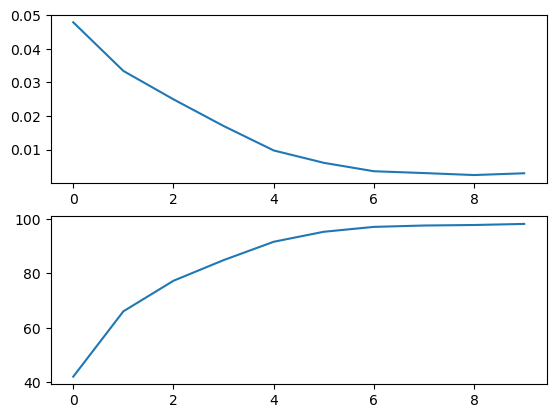

In [34]:
plt.subplot(2,1,1)
plt.plot(losses)
plt.subplot(2,1,2)
plt.plot(acc)